# Performance

Quien soy

Porque, contexto

## Indice
- Performance, Big O
- Comparativa de Operaciones
- Benchmark tests: ASV



![IMAGEN](imgs/graph.png)

In [54]:
%run python_performance/timeit_series.py

# Constante. O(c)

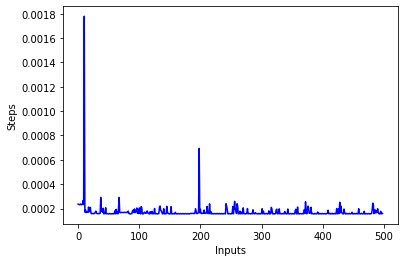

In [8]:
def recuperar_elemento_lista(mi_lista):
    result = mi_lista[0]
    return result

tiempos = calcular_tiempos_lista_str(recuperar_elemento_lista)
print_grafica(tiempos)

# Linear. O(n)

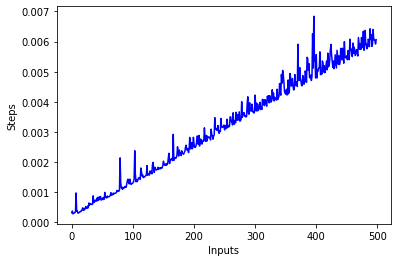

In [11]:
def recuperar_elementos_lista(mi_lista):
    for elemento in mi_lista:
        result = elemento
    return result

tiempos = calcular_tiempos_lista_str(recuperar_elementos_lista)
print_grafica(tiempos)

# Linear. O(log n)

In [20]:
def busqueda_binaria(lista):
    num_a_encontrar = 100000000
    first = 0
    last = len(lista)-1
    found = False

    while first <= last and not found:
        midpoint = (first + last) // 2

        if lista[midpoint] == num_a_encontrar:
            found = True
        else:
            if num_a_encontrar < lista[midpoint]:
                last = midpoint - 1
            else:
                first = midpoint + 1

    return found

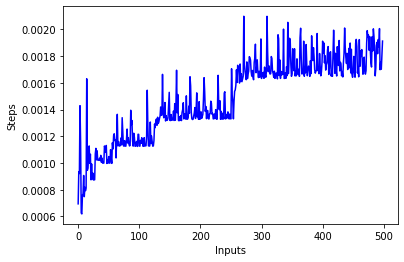

In [19]:
tiempos = calcular_tiempos_lista_int(busqueda_binaria)
print_grafica(tiempos)

# Cuadrático. O(n^2) 

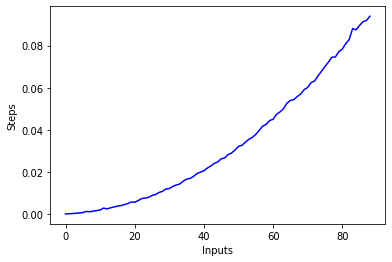

In [6]:
def recuperar_elementos_lista(mi_lista):
    for elemento in mi_lista:
        for elemento_2 in mi_lista:
            result = elemento_2
    return result

tiempos = calcular_tiempos_lista_str(recuperar_elementos_lista, num_elements=90)
print_grafica(tiempos)

# Exponencial. O(2^n)

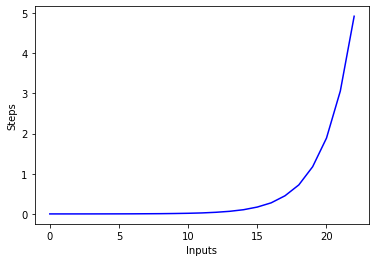

In [5]:
def fibonacci(n):
    if n in {0, 1}:
        return 1
    else:
        return fibonacci(n - 1) + fibonacci(n - 2)

tiempos = calcular_tiempos_enteros(fibonacci, num_elements=23)
print_grafica(tiempos)

# Ahora, ejemplos del día a día

## Ver si un elemento existe en una lista

In [23]:
def dime_si_existe_un_elemento_mal(mi_lista):
    result = "NO existe"
    for element in mi_lista:
        if element == "10":
            result = "Existe"

    return result


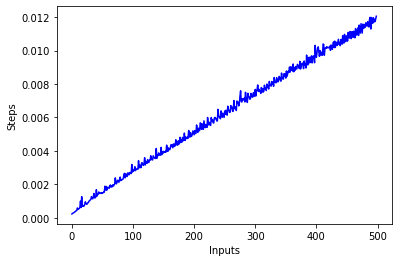

In [24]:
tiempos = calcular_tiempos(dime_si_existe_un_elemento_mal, num_elements=500)
print_grafica(tiempos)

<center><h1>👎</h1></center>

In [21]:
def dime_si_existe_un_elemento_alternativa(mi_lista):
    result = "NO existe"
    try:
        mi_lista.index("10")
        result = "Existe"
    except ValueError:
        pass
    return result


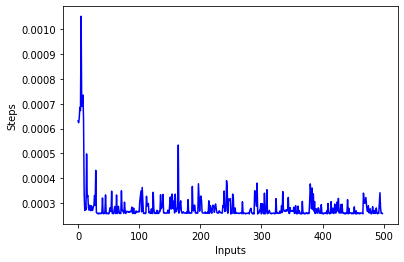

In [16]:
tiempos = calcular_tiempos(dime_si_existe_un_elemento_alternativa, num_elements=500)
print_grafica(tiempos)

In [17]:
def dime_si_existe_un_elemento(mi_lista):
    result = "NO existe"
    if "10" in mi_lista:
        result = "Existe"

    return result


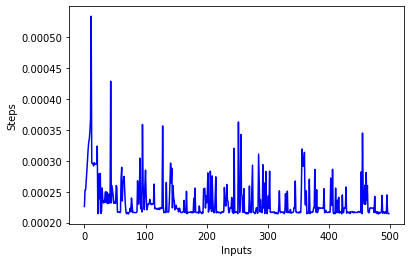

In [11]:
tiempos = calcular_tiempos_lista_str(dime_si_existe_un_elemento, num_elements=500)
print_grafica(tiempos)

<center><h1>👍</h1></center>

# Comparando operaciones

In [40]:
CONSTANT_EX = "my example"
DICT_EX = {f"key{i}": f"my example{i}" for i in range(500)}
LIST_EX = [f"my example{i}" for i in range(500)]
TUPLE_EX = tuple(f"my example{i}" for i in range(500))

## Añadir/eliminar elementos a una lista. Linear O(n)


In [41]:
def aniadir_elementos_al_final(mi_lista):
    num_elements = len(mi_lista)
    nueva_lista = []
    for i in range(num_elements):
        nueva_lista.append(str(i)) # ocurre lo mismo con lista.pop()
        


In [42]:
%%timeit
aniadir_elementos_al_final(LIST_EX)

98.2 µs ± 479 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


<center><h1>👍</h1></center>

In [43]:
def aniadir_elementos_al_principio(mi_lista):
    num_elements = len(mi_lista)
    nueva_lista = []
    for i in range(num_elements):
        nueva_lista.insert(0, str(i)) # ocurre lo mismo con lista.remove(str(i))

In [44]:
%%timeit
aniadir_elementos_al_principio(LIST_EX)

158 µs ± 1.41 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


<center><h1>👎</h1></center>

## Asignación

In [37]:
%%timeit
for i in range(50):
    a = DICT_EX[f"key{i}"]

9.92 µs ± 264 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [41]:
%%timeit
for i in range(50):
    a = LIST_EX[i]

1.96 µs ± 3.05 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [44]:
%%timeit
for i in range(50):
    a = TUPLE_EX[i]

1.88 µs ± 14.9 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [34]:
%%timeit
for i in range(50):
    a = CONSTANT_EX

1.25 µs ± 1.56 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


# Acceder a funciones de módulo

In [2]:
import os

os_abspath = os.path.abspath

In [33]:
%%timeit

a =  os.path.abspath("mi/directorio")

4.54 µs ± 45.3 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [35]:
%%timeit

a =  os_abspath("mi/directorio")

4.36 µs ± 20.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


# Acceder a funciones de logging

In [19]:
import logging

logger = logging.getLogger(__name__)
logger_info = logger.info

In [28]:
%%timeit

logger.info("log")

307 ns ± 0.935 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [29]:
%%timeit

logger_info("log")

287 ns ± 1.3 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


## Range (len) vs Enumerate

In [4]:
%%timeit
for i in range(len(LIST_EX)):
    a = LIST_EX[i] * 2

4.22 µs ± 31.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [5]:
%%timeit
for idx, value in enumerate(LIST_EX):
    a = value * 2

3.74 µs ± 25.1 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


# Diccionarios Vs condicionales

In [37]:
data = {
    "action0": "result0",
    "action1": "result1",
    "action2": "result2",
    "action3": "result3",
    "action4": "result4",
    "action5": "result5",
    "action6": "result6",
}


def get_data_dict(action):
    return data.get(action, "")


def get_data_if(action):
    result = ""
    if action == "action0":
        result = "result0"
    if action == "action1":
        result = "result1"
    elif action == "action2":
        result = "result2"
    elif action == "action3":
        result = "result3"
    elif action == "action4":
        result = "result4"
    elif action == "action5":
        result = "result5"
    elif action == "action6":
        result = "result6"
    return result

In [45]:
%%timeit
for i in range(7):
    a = get_data_dict(f"action{i}")

2.15 µs ± 17.1 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [49]:
%%timeit
for i in range(7):
    a = get_data_if(f"action{i}")

2.47 µs ± 8.76 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


# Funciones

In [50]:
def func_1(a, b, c):
    return f"hello {a} {b} {c}"

def func_2(a, b, c):
    return func_1(a, b, c)

def func_3(a, b, c):
    return func_2(a, b, c)

def func_4(a, b, c):
    return func_3(a, b, c)

def func_5(a, b, c):
    return func_4(a, b, c)

def func_6(a, b, c):
    return func_5(a, b, c)

In [51]:
%%timeit
for i in range(7):
    a = func_1(f"{i}", f"{i + 1}", f"{i + 2}")

3.06 µs ± 50.3 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


<center><h1>👍</h1></center>

In [53]:
%%timeit
for i in range(7):
    a = func_6(f"{i}", f"{i + 1}", f"{i + 2}")

5.43 µs ± 47.6 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


# ASV

Air Speed Velocity es una herramienta para medir el rendimiento de una aplicación (benchmark tests). Herramienta creada por algunos de los desarrolladores de Numpy.

Características:
- Medir la diferencia 


- Repo: https://github.com/airspeed-velocity/asv
- Demo: https://pv.github.io/numpy-bench/